
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 3


### Name :Vinni Fengade
### Roll No. :67

## $\hspace{70pt} $Simple Linear Regression
### 1. Consider a set of points x and the predicted values y as given below:
### x = [0, 2, 3, 5, 6, 7, 8, 8, 9, 10]
### y = [2, 4, 5, 6, 7.5, 8.5, 9, 10, 11, 12]


### (a) Plot the data.

In [10]:
import matplotlib.pyplot as plt

In [29]:
x = [0,2,3,5,6,7,8,8,9,10]
y = [2,4,5,6,7.5,8.5,9,10,11,12]

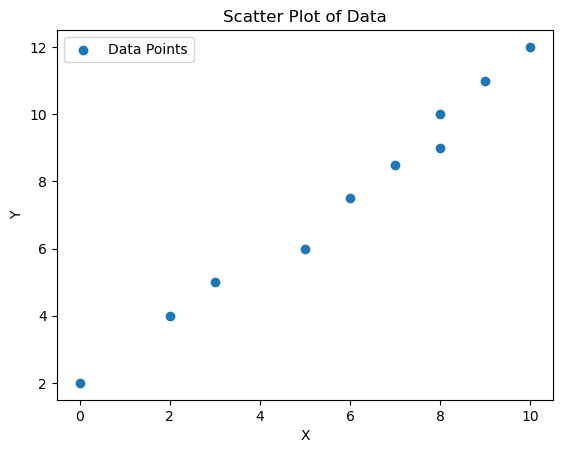

In [30]:
# Plot the data
plt.scatter(x, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

### (b) Use LinearRegression model from sklearn library to perform linear regression.

In [36]:
from sklearn.linear_model import LinearRegression

# Reshape the data
x = np.array(x).reshape(-1, 1)
y = np.array(y)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your data
model.fit(x, y)

# Get the coefficients of the linear equation
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the line
print(f"Linear Equation: y = {slope:.2f}x + {intercept:.2f}")


Linear Equation: y = 0.98x + 1.83


In [35]:
import numpy as np

# Reshape the data
x = np.array(x)
y = np.array(y)
# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the differences between each data point and the mean
diff_x = x - mean_x
diff_y = y - mean_y

# Calculate the slope (m) and intercept (b) of the linear equation (y = mx + b)
m = np.sum(diff_x * diff_y) / np.sum(diff_x**2)
b = mean_y - m * mean_x

# Print the equation of the line
print(f"Linear Equation: y = {m:.2f}x + {b:.2f}")

Linear Equation: y = 0.98x + 1.83


### (c) Consider a data value for x and predict the value of y using the above model.

In [37]:
# Predict the value of y for a given x
x_pred = np.array([[4]])  # Reshape to a 2D array
y_pred = model.predict(x_pred)

print(f"For x = 4, the predicted y value is {y_pred[0]:.2f}")

For x = 4, the predicted y value is 5.74


### 2. The given table shows the midterm and final exam grades obtained for students in a database course.
### Data
#### X = [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81]
#### Y = [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]

### (a) Plot the data. Do x and y seem to have a linear relationship?

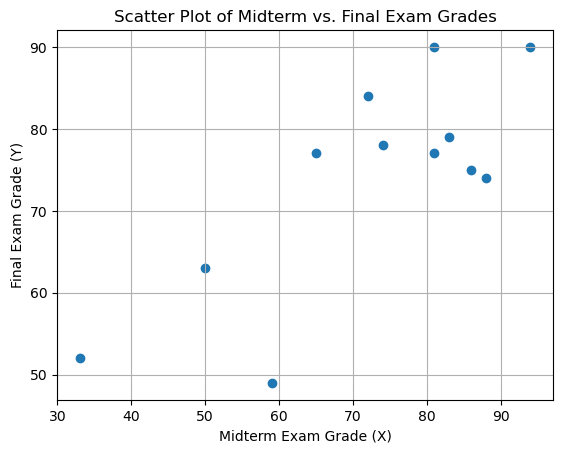

In [39]:
import matplotlib.pyplot as plt

# Data
X = [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81]
Y = [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90]

# Plot the data
plt.scatter(X, Y)
plt.xlabel('Midterm Exam Grade (X)')
plt.ylabel('Final Exam Grade (Y)')
plt.title('Scatter Plot of Midterm vs. Final Exam Grades')
plt.grid(True)
plt.show()

### (b) Use the method of least squares to find an equation for the prediction of a student’s final exam grade based on the student’s midterm grade in the course.
### Write a function in python to compute the coefficients and equation. [Do not use the inbuild library method.]

In [40]:
def least_squares(X, Y):
    n = len(X)
    sum_x = sum(X)
    sum_y = sum(Y)
    sum_x_squared = sum(x**2 for x in X)
    sum_xy = sum(x * y for x, y in zip(X, Y))

    # Calculate slope (m) and intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / n

    return m, b

# Calculate the coefficients
slope, intercept = least_squares(X, Y)

# Print the linear equation
print(f"Linear Equation: Y = {slope:.2f}X + {intercept:.2f}")

Linear Equation: Y = 0.58X + 32.03


### (c) Also show the plot with the datapoints and the obtained linear equation line.

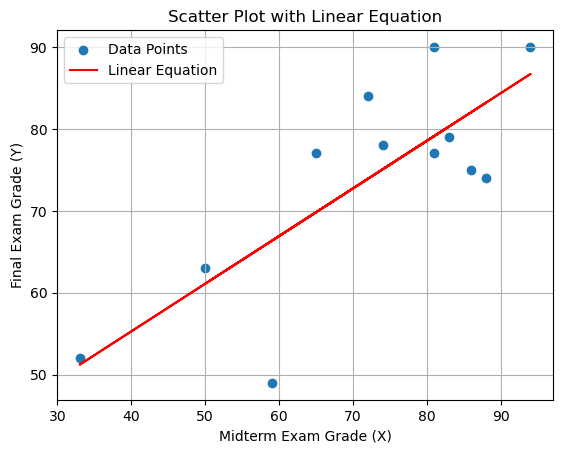

In [42]:
# Plot the data points and the linear equation line
plt.scatter(X, Y, label='Data Points')
plt.plot(X, [slope * x + intercept for x in X], color='red', label='Linear Equation')
plt.xlabel('Midterm Exam Grade (X)')
plt.ylabel('Final Exam Grade (Y)')
plt.title('Scatter Plot with Linear Equation')
plt.legend()
plt.grid(True)
plt.show()

### (d) Predict the final exam grade of student who received an 86 in the midterm exam based on the equation of least squares.

In [43]:
# Predict the final exam grade for X = 86
X_pred = 86
Y_pred = slope * X_pred + intercept

print(f"For X = {X_pred}, the predicted final exam grade is {Y_pred:.2f}")

For X = 86, the predicted final exam grade is 82.05


## $\hspace{70pt} $Multiple Linear Regression
### 3. Perform linear regression on the dataset [use dataset: kc_house_data.csv]


#### (a) Load the dataset, display it, visualize various columns and explain the dataset composition.

In [44]:
!pip install pandas numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("kc_house_data.csv")

# Display the first few rows of the dataset
print(data.head(2))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]


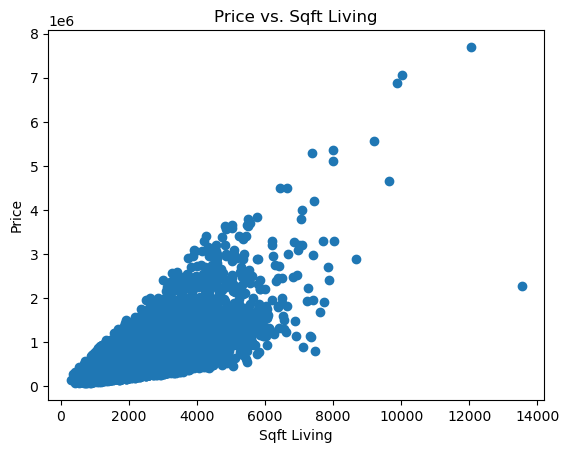

In [56]:
# Visualize various columns (e.g., price, bedrooms, bathrooms, sqft_living)
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Price vs. Sqft Living')
plt.show()

# You can visualize other columns similarly to understand the dataset.

#### (b) Describe the dataset

In [57]:
description = data.describe()
print(description)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

#### (c) Houses with how many bedrooms are most sold?

In [58]:
# Find the number of houses with each bedroom count and get the most common
most_sold_bedrooms = data['bedrooms'].value_counts().idxmax()
print(f"Houses with {most_sold_bedrooms} bedrooms are most sold.")

Houses with 3 bedrooms are most sold.


#### (d) Visualizing the location of the houses based on latitude and longitude. Use appropriate plot.

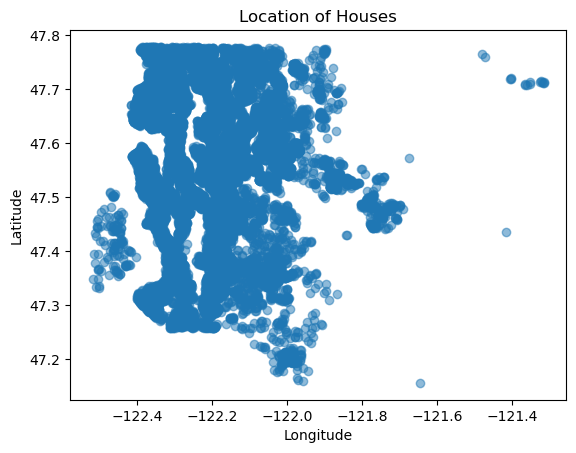

In [59]:
# Visualize the location of houses based on latitude and longitude
plt.scatter(data['long'], data['lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Houses')
plt.show()

#### (e) Find the correlated features/ columns

In [52]:
# Find the correlation between features and target variable (price)
correlation_matrix = data.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


#### (f) Find null values and fill with mean value for all columns

In [60]:
# Find and handle null values by filling them with the mean value for all columns
# Load the dataset
data2 = pd.read_csv("kc_house_data.csv")
print(data2)
data.fillna(data2.mean(), inplace=True)
print(data2)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

C:\Users\User\AppData\Local\Temp\ipykernel_13932\4036225440.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data2.mean(), inplace=True)


#### (g) Find dependant and independent data (place in X and y)

In [61]:
X = data[['sqft_living']]  # Independent variable
y = data['price']  # Dependent variable

#### (h) Split train and test data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### (i) Train the model and test it. Find the accuracy.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 76484977061.78
R-squared: 0.49


#### (j) Test the model using some arbitrary input.

In [65]:
# Test the model using arbitrary input
arbitrary_input = [[2000]]  # Replace with the sqft_living value you want to predict for
predicted_price = model.predict(arbitrary_input)
print(f"Predicted Price: {predicted_price[0]:.2f}")


Predicted Price: 517110.37


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
